# Zimp Word Count Analysis
How much do different tokenizers diverge?

In [1]:
import pandas as pd
import numpy as np
import os
import logging
import matplotlib.pyplot as plt
import time
from zimp.pos.wordcount_analyzer import WordCountAnalyzer, WordCountStrategy
from glob import glob

plt.style.use('seaborn-whitegrid')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!


In [2]:
source_dir = '../../zimp_orchestrator/orch/resources'
files = {}

In [3]:
for ds_path in glob(source_dir + '/*'):
    ds_name = os.path.basename(ds_path)
    files[ds_name] = [os.path.join(ds_path, 'train.csv'), os.path.join(ds_path, 'test.csv')]

In [4]:
def get_ds_stats(ds_name, paths, wca_builder, track_name):
    texts = pd.read_csv(paths[0]).text.append(pd.read_csv(paths[1]).text)
    start_time = time.process_time()
    df =  wca_builder(texts).extract_dataset_metric().rename(columns={'count': track_name})
    print(f"{ds_name} with {track_name} took {time.process_time()-start_time}s")
    return df

In [5]:
def cropped_line_plot(df, dataset):
    
    if len(df.index) > 250:
        # remove all values above 95-percentile
        cs = df.sum(axis=1).cumsum()
        df_plot = df[cs< cs.iloc[-1]*.95]
        # resample to 100 equal-size intervals
        df_plot = df_plot.groupby(pd.cut(df_plot.index, 100))\
            .agg(lambda s: s.sum())\
            .rename(lambda idx: max(idx.left, 0))\
            .fillna(0)
    else:
        df_plot = df
    
    df_plot.plot(
        figsize=(10,5),
        color=plt.cm.jet(np.linspace(0, 1, len(df_plot.columns))),
        alpha=.5,
        title=f'Number of words per observation ({dataset})',
        xlabel='Number of words',
        ylabel='Frequency'
    )
    
    plt.savefig(f'tokenizer_compare/barchart_{dataset}.pdf')
    plt.show()

In [6]:
def violin_plot(df, dataset):
    
    if len(df.index) > 250:
        # remove all values above 95-percentile
        cs = df.sum(axis=1).cumsum()
        df_plot = df[cs< cs.iloc[-1]*.95]
    else:
        df_plot = df
        
    fig, axes = plt.subplots(figsize=(15,5))

    v_parts = axes.violinplot(dataset = [df_plot.index.repeat(df_plot[col].fillna(0)) for col in df_plot.columns], showmedians=True)

    colors=plt.cm.jet(np.linspace(0, 1, len(df.columns)))

    for partname in ('cbars','cmins','cmaxes','cmedians'):
        vp = v_parts[partname]
        vp.set_edgecolor('#000000')
        vp.set_linewidth(.5 if partname == 'cbars' else 1)
        vp.set_alpha(.5 if partname == 'cbars' else 1)

    # Make the violin body blue with a red border:
    for idx, vp in enumerate(v_parts['bodies']):
        vp.set_facecolor(colors[idx])
        vp.set_edgecolor(colors[idx])
        vp.set_linewidth(1)
        vp.set_alpha(0.5)

    axes.set_title(f'Word Count per strategy  ({dataset})')
    axes.yaxis.grid(True)
    axes.set_xlabel('Strategy')
    axes.set_ylabel('Count of Words')
    axes.set_xticks(np.arange(1, len(df_plot.columns) + 1), labels=df_plot.columns, fontsize=8)
    
    plt.savefig(f'tokenizer_compare/violinplot_{dataset}.pdf')
    plt.show()

10K-GNAD with REGEX took 1.84375s
10K-GNAD with PYTHON took 0.390625s
10K-GNAD with NLTK_BASE took 44.84375s
10K-GNAD with WORD_PUNKT took 2.203125s
10K-GNAD with NLTK_TWEET took 34.71875s
10K-GNAD with NLTK_NIST took 13.984375s
10K-GNAD with SPACY took 34.078125s
10K-GNAD with TEXTBLOB took 70.84375s
10K-GNAD with GENSIM took 5.640625s
10K-GNAD with NLTK_BASE_GER took 45.3125s
10K-GNAD with SPACY_GER took 30.4375s


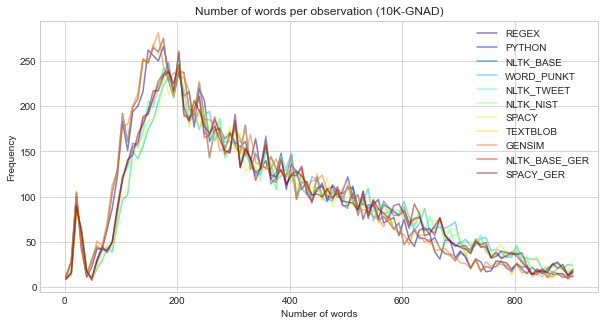

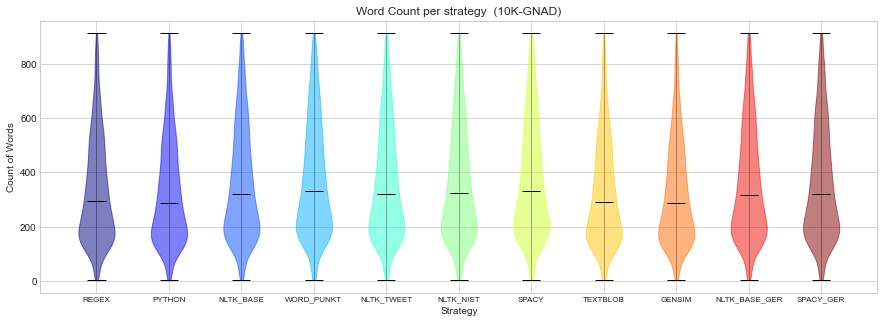

DBP-14 with REGEX took 16.453125s
DBP-14 with PYTHON took 3.609375s
DBP-14 with NLTK_BASE took 332.96875s
DBP-14 with WORD_PUNKT took 16.859375s
DBP-14 with NLTK_TWEET took 279.703125s
DBP-14 with NLTK_NIST took 159.125s
DBP-14 with SPACY took 488.90625s
DBP-14 with TEXTBLOB took 733.015625s
DBP-14 with GENSIM took 62.265625s
DBP-14 with NLTK_BASE_GER took 449.25s
DBP-14 with SPACY_GER took 464.703125s


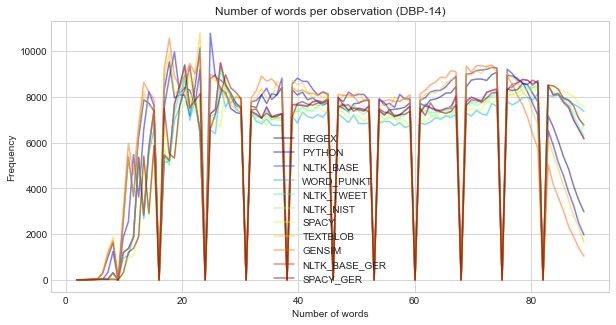

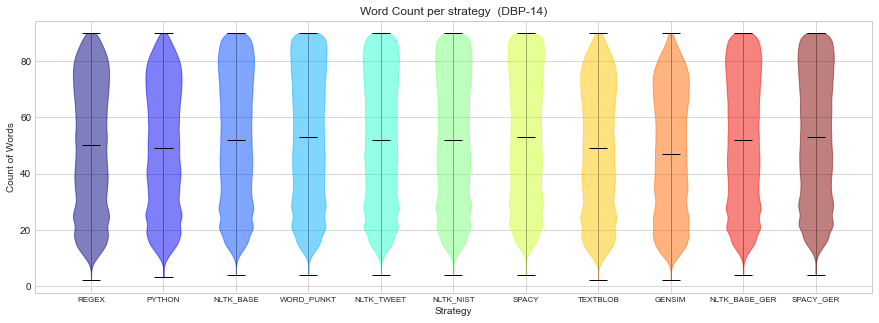

GERMEVAL-2018 with REGEX took 0.125s
GERMEVAL-2018 with PYTHON took 0.015625s
GERMEVAL-2018 with NLTK_BASE took 3.453125s
GERMEVAL-2018 with WORD_PUNKT took 0.140625s
GERMEVAL-2018 with NLTK_TWEET took 1.765625s
GERMEVAL-2018 with NLTK_NIST took 1.0625s
GERMEVAL-2018 with SPACY took 3.640625s
GERMEVAL-2018 with TEXTBLOB took 5.28125s
GERMEVAL-2018 with GENSIM took 0.34375s
GERMEVAL-2018 with NLTK_BASE_GER took 3.3125s
GERMEVAL-2018 with SPACY_GER took 3.5s


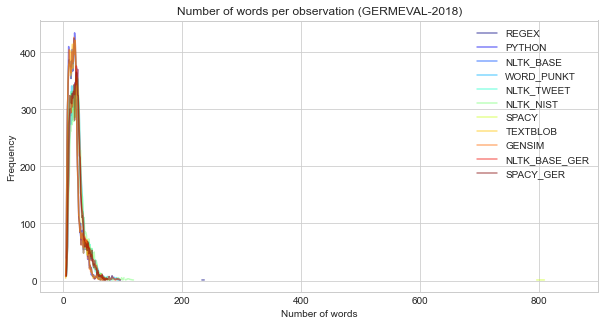

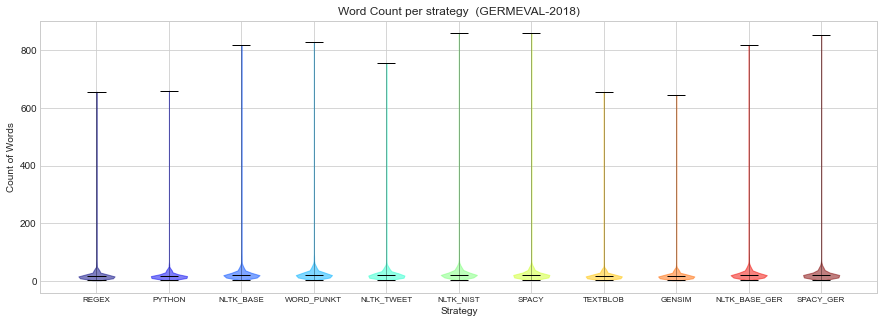

GERMEVAL-2020 with REGEX took 3.0625s
GERMEVAL-2020 with PYTHON took 0.765625s
GERMEVAL-2020 with NLTK_BASE took 72.921875s
GERMEVAL-2020 with WORD_PUNKT took 3.34375s
GERMEVAL-2020 with NLTK_TWEET took 44.78125s
GERMEVAL-2020 with NLTK_NIST took 24.140625s
GERMEVAL-2020 with SPACY took 48.828125s
GERMEVAL-2020 with TEXTBLOB took 106.703125s
GERMEVAL-2020 with GENSIM took 10.171875s
GERMEVAL-2020 with NLTK_BASE_GER took 70.71875s
GERMEVAL-2020 with SPACY_GER took 45.0s


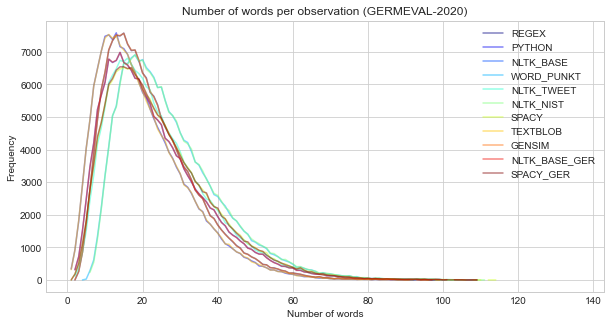

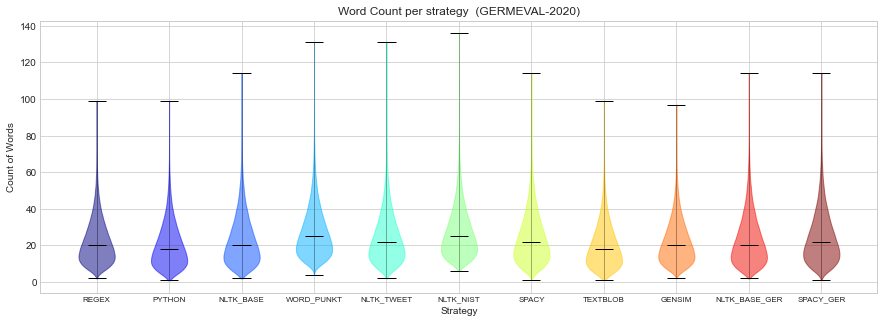

TREC-6 with REGEX took 0.046875s
TREC-6 with PYTHON took 0.015625s
TREC-6 with NLTK_BASE took 1.109375s
TREC-6 with WORD_PUNKT took 0.046875s
TREC-6 with NLTK_TWEET took 0.609375s
TREC-6 with NLTK_NIST took 0.375s
TREC-6 with SPACY took 1.59375s
TREC-6 with TEXTBLOB took 2.5625s
TREC-6 with GENSIM took 0.140625s
TREC-6 with NLTK_BASE_GER took 1.59375s
TREC-6 with SPACY_GER took 1.5s


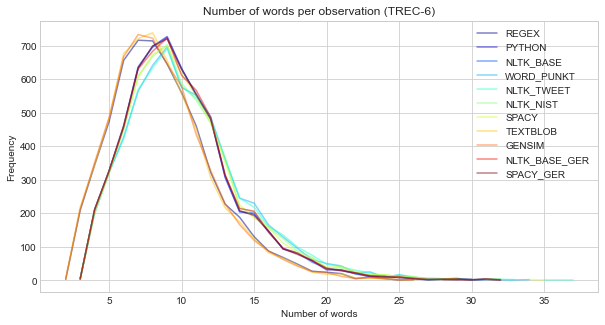

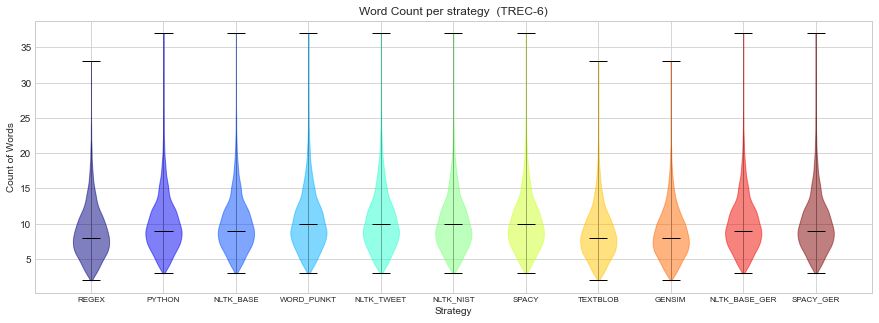

YELP-5 with REGEX took 38.09375s
YELP-5 with PYTHON took 9.703125s
YELP-5 with NLTK_BASE took 715.515625s
YELP-5 with WORD_PUNKT took 33.546875s
YELP-5 with NLTK_TWEET took 467.40625s
YELP-5 with NLTK_NIST took 201.6875s
YELP-5 with SPACY took 235.09375s
YELP-5 with TEXTBLOB took 963.53125s
YELP-5 with GENSIM took 62.734375s
YELP-5 with NLTK_BASE_GER took 601.875s
YELP-5 with SPACY_GER took 197.96875s


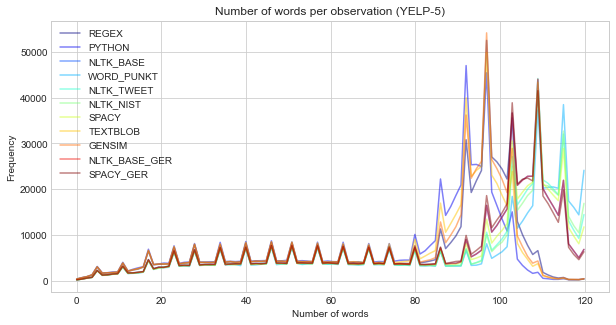

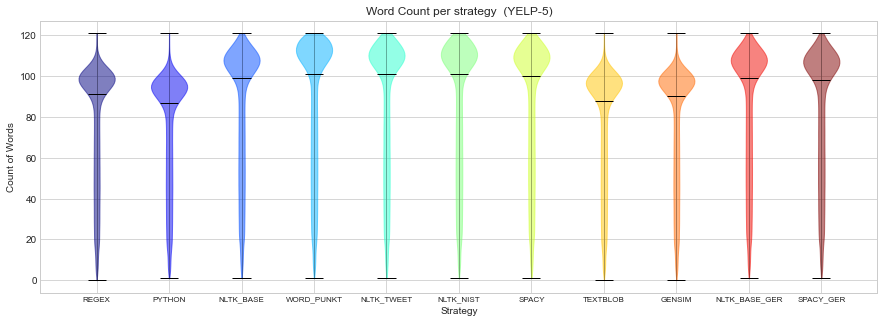

In [7]:
for dataset in files.keys():
    dfs = []
    for strategy in WordCountStrategy:
        dfs.append(get_ds_stats(dataset, files[dataset], lambda texts: WordCountAnalyzer(texts, strategy=strategy), strategy.name))
    dfs.append(get_ds_stats(dataset, files[dataset], lambda texts: WordCountAnalyzer(texts, strategy=WordCountStrategy.NLTK_BASE, language='german'), 'NLTK_BASE_GER'))
    dfs.append(get_ds_stats(dataset, files[dataset], lambda texts: WordCountAnalyzer(texts, strategy=WordCountStrategy.SPACY, language='german'), 'SPACY_GER'))
    df = pd.concat(dfs, axis=1)
    cropped_line_plot(df, dataset)
    violin_plot(df, dataset)
    df.to_csv(f'tokenizer_compare/{dataset}.csv')